In [3]:
import numpy as np
import ot
import pandas as pd
from collections import defaultdict
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True, connected=True)
%matplotlib widget
import matplotlib.pyplot as plt
import TiOT_lib


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_alignment(y1, y2, mapping, 
                   color1='red', color2='blue', line_color='green',
                   title="Alignment", figsize=(12, 8), alpha=0.8,
                   show=True):
    """
    Plot alignment between two sequences given a mapping with weights.
    Uses indices as x-coordinates.

    Parameters
    ----------
    y1, y2 : array-like
        Two sequences to align.
    mapping : list of tuples
        List of (i, j, weight) specifying alignments.
    color1 : str, optional
        Color for first sequence.
    color2 : str, optional
        Color for second sequence.
    line_color : str, optional
        Color for alignment lines.
    title : str, optional
        Plot title.
    figsize : tuple, optional
        Figure size.
    alpha : float, optional
        Transparency of alignment lines.
    show : bool, optional
        Whether to display the plot immediately.

    Returns
    -------
    fig, ax : matplotlib Figure and Axes
    """

    x1 = np.arange(len(y1))
    x2 = np.arange(len(y2))

    fig, ax = plt.subplots(figsize=figsize)

    # Plot sequences
    ax.plot(x1, y1,  color=color1, zorder=2)
    ax.plot(x2, y2,  color=color2, zorder=2)

    # Draw alignments
    for i, j, w in mapping:
        ax.plot([x1[i], x2[j]], [y1[i], y2[j]],
                color=line_color, lw=w * len(x1), alpha=alpha, zorder=1)

    # Style
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(True)
    ax.set_title(title, fontsize=12)

    plt.tight_layout()

    if show:
        plt.show()

    return fig, ax


# Example usage
# if __name__ == "__main__":
#     y1 = np.sin(np.linspace(0, 10, 48))
#     y2 = np.cos(np.linspace(0, 10, 48)) + 3

#     mapping = [(0, j, np.random.uniform(0.5, 3)) for j in range(len(y2))]
#     print(mapping)
#     plot_alignment(y1, y2, mapping, title="Pathological Alignment")


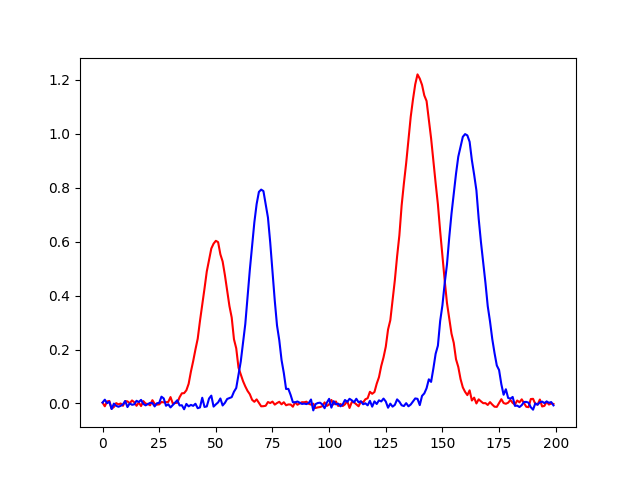

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def generate_two_peak_series(n=200, 
                             peaks1=[50, 120], peaks2=[50, 120], 
                             shift=0, 
                             height1=[1, 1], height2=[1, 1], 
                             width1=[5, 5], width2=[5, 5], 
                             noise=0.0, seed=None):
    """
    Generate two synthetic time series with two Gaussian-like peaks.

    Parameters
    ----------
    n : int
        Length of the time series.
    peaks1 : list of int
        Positions of peaks for the first series.
    peaks2 : list of int
        Base positions of peaks for the second series.
    shift : int
        Shift applied to all peaks of the second series.
    height1, height2 : list of float
        Heights of peaks for each series.
    width1, width2 : list of float
        Standard deviation (spread) of peaks.
    noise : float
        Standard deviation of added Gaussian noise.
    seed : int or None
        Random seed for reproducibility.

    Returns
    -------
    t : np.ndarray
        Time index.
    y1, y2 : np.ndarray
        Two synthetic time series.
    """
    rng = np.random.default_rng(seed)
    t = np.arange(n)

    def gaussians(t, peaks, heights, widths):
        y = np.zeros_like(t, dtype=float)
        for p, h, w in zip(peaks, heights, widths):
            y += h * np.exp(-(t - p) ** 2 / (2 * w ** 2))
        return y

    y1 = gaussians(t, peaks1, height1, width1)
    y2 = gaussians(t, [p + shift for p in peaks2], height2, width2)

    if noise > 0:
        y1 += rng.normal(0, noise, size=n)
        y2 += rng.normal(0, noise, size=n)

    return t, y1, y2


# Example usage
t, y1, y2 = generate_two_peak_series(
    n=200, 
    peaks1=[50, 140], peaks2=[50, 140], 
    shift=20, height1=[0.6, 1.2], height2=[0.8, 1.0],
    width1=[6, 8], width2=[5, 7],
    noise=0.01, seed=42
)
plt.figure()
plt.plot(t, y1, color='red')
plt.plot(t, y2, color='blue')
plt.show()


In [122]:
d, pi, w = TiOT_lib.TiOT(y1, y2, detail_mode=True)
mapping = [(i,j, pi[i][j]) for i in range(len(pi[0])) for j in range(len(pi))]

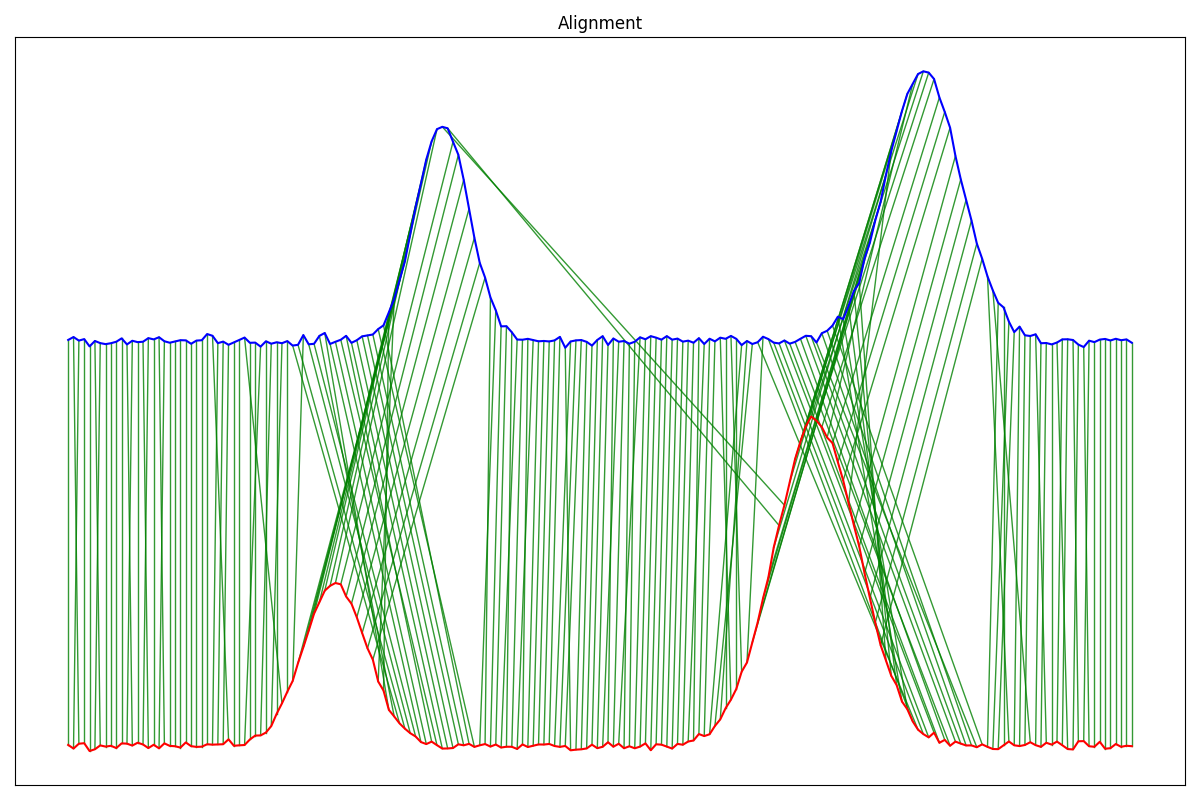

(<Figure size 1200x800 with 1 Axes>, <Axes: title={'center': 'Alignment'}>)

In [123]:
plot_alignment(y1, y2 + 1.5, mapping=mapping)

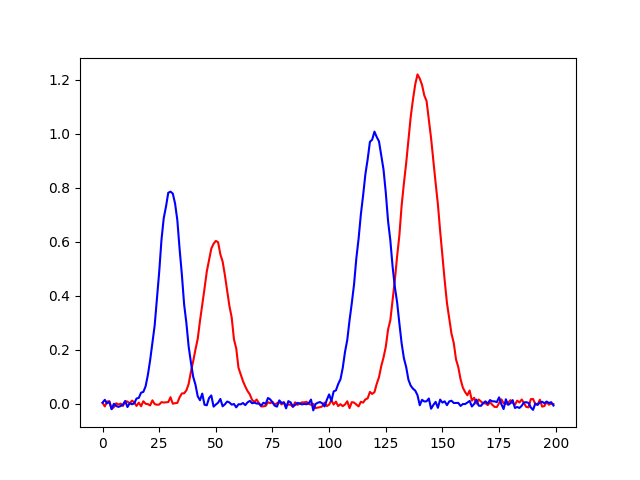

In [30]:
t, y1, y2 = generate_two_peak_series(
    n=200, 
    peaks1=[50, 140], peaks2=[50, 140], 
    shift=-20, height1=[0.6, 1.2], height2=[0.8, 1.0],
    width1=[6, 8], width2=[5, 7],
    noise=0.01, seed=42
)
plt.figure()
plt.plot(t, y1, color='red')
plt.plot(t, y2, color='blue')
plt.show()

C:\Users\DUY THÁI\AppData\Local\Temp\ipykernel_14360\3579247455.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


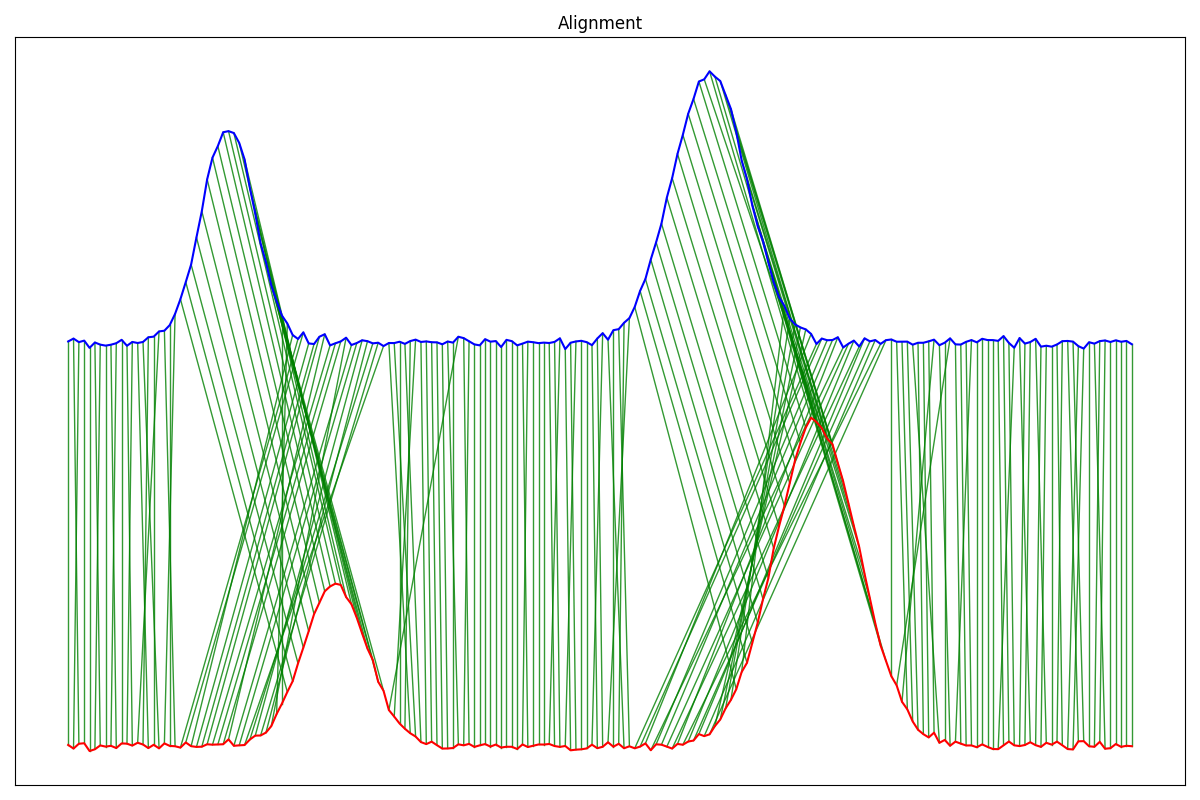

(<Figure size 1200x800 with 1 Axes>, <Axes: title={'center': 'Alignment'}>)

In [31]:
d, pi, w = TiOT_lib.TiOT(y1, y2, detail_mode=True)
mapping = [(i,j, pi[i][j]) for i in range(len(pi[0])) for j in range(len(pi))]
plot_alignment(y1, y2 + 1.5, mapping=mapping)

## ---------------------------------------------
# Extra Temperature Experiment
## ---------------------------------------------

In [4]:
file_path = 'DailyDelhiClimateTrain.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
# Ensure 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set the date as the index if needed (optional)
df.set_index('date', inplace=True)

In [8]:
def extract_weekly_temp(series, window=2, center=True):
    """
    Convert a daily series into weekly averages and apply a moving average.

    Parameters
    ----------
    series : pandas.Series
        Daily data (length ~365).
    window : int, optional
        Window size for moving average (default=3).
    center : bool, optional
        Whether to set the window to be centered (default=True).

    Returns
    -------
    pandas.Series
        Smoothed weekly temperature series.
    """
    weekly = series.resample("W").mean()
    smoothed = weekly.rolling(window=window, min_periods=1, center=center).mean()
    return smoothed
y1 = df['meantemp'].iloc[0:0 + 365]
y2 = df['meantemp'].iloc[20:20 + 365]
y3 = df['meantemp'].iloc[50:50 + 365]
y4 = df['meantemp'].iloc[80:80 + 365]
y5 = df['meantemp'].iloc[180:180 + 365]
#y6 = extract_weekly_temp(df['meantemp'].iloc[180:180 + 365])



In [9]:
w_list = [0.1 * i for i in range(11)]
d12 = []
d13 = []
d14 = []
d15 = []
#d16 = []
for w in w_list:
    print(f"Start w = {w}")
    d12.append(TiOT_lib.TAOT(y1.to_list(), y2.to_list(), w = w)[0])
    d13.append(TiOT_lib.TAOT(y1.to_list(), y3.to_list(), w = w)[0])
    d14.append(TiOT_lib.TAOT(y1.to_list(), y4.to_list(), w = w)[0])
    d15.append(TiOT_lib.TAOT(y1.to_list(), y5.to_list(), w = w)[0])
    #d16.append(TiOT_lib.TAOT(y1.to_list(), y6.to_list(), w = w)[0])




Start w = 0.0
Start w = 0.1
Start w = 0.2
Start w = 0.30000000000000004
Start w = 0.4
Start w = 0.5
Start w = 0.6000000000000001
Start w = 0.7000000000000001
Start w = 0.8
Start w = 0.9
Start w = 1.0


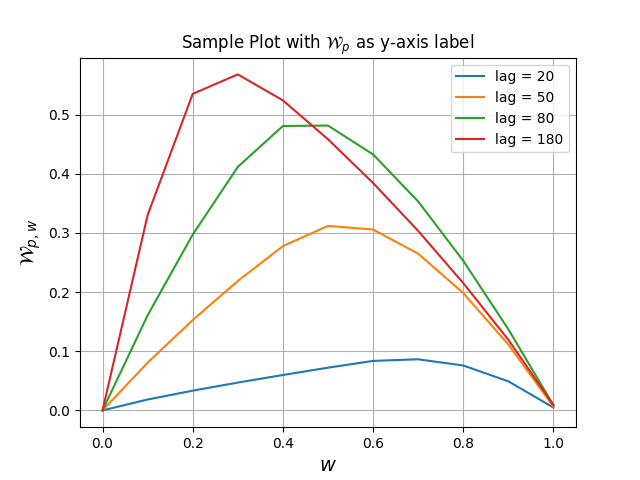

In [ ]:
plt.figure()
plt.plot(w_list, d12, label = "lag = 20")
plt.plot(w_list, d13, label = 'lag = 50')
plt.plot(w_list, d14, label = 'lag = 80')
plt.plot(w_list, d15, label = 'lag = 180')
#plt.plot(w_list, d16)
plt.xlabel(r"$w$", fontsize= 14)
plt.ylabel(r'$\mathcal{W}_{p,w}$', fontsize= 14)  # y-axis label as W_p in mathcal font

plt.title("Sample Plot with $\\mathcal{W}_p$ as y-axis label")
plt.legend()
plt.grid(True)
plt.show()



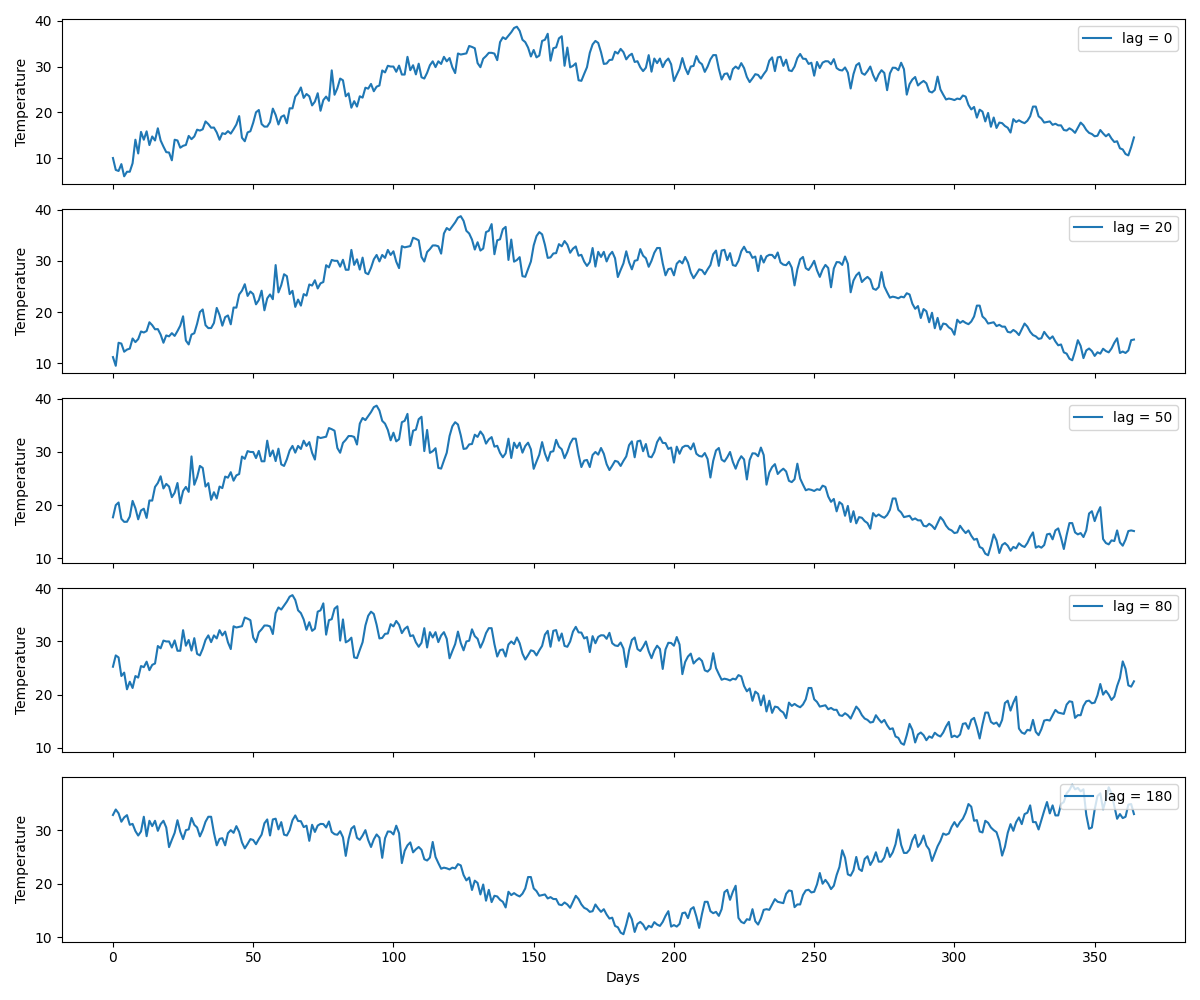

In [26]:
import matplotlib.pyplot as plt

# Example: y1...y5 are lists of the same length
# y1, y2, y3, y4, y5 = [...]

series_list = [y1, y2, y3, y4, y5]
series_names = ['y1', 'y2', 'y3', 'y4', 'y5']
lags = [0,20,50,80,180]
i = 0
x = range(len(y1))  # assuming all lists have the same length

fig, axes = plt.subplots(len(series_list), 1, figsize=(12, 10), sharex=True)

for ax, series, name in zip(axes, series_list, series_names):
    ax.plot(x, series, label=f"lag = {lags[i]}")
    ax.set_ylabel('Temperature')
    ax.legend(loc="upper right")
    i +=1
axes[-1].set_xlabel("Days")
plt.tight_layout()
plt.show()


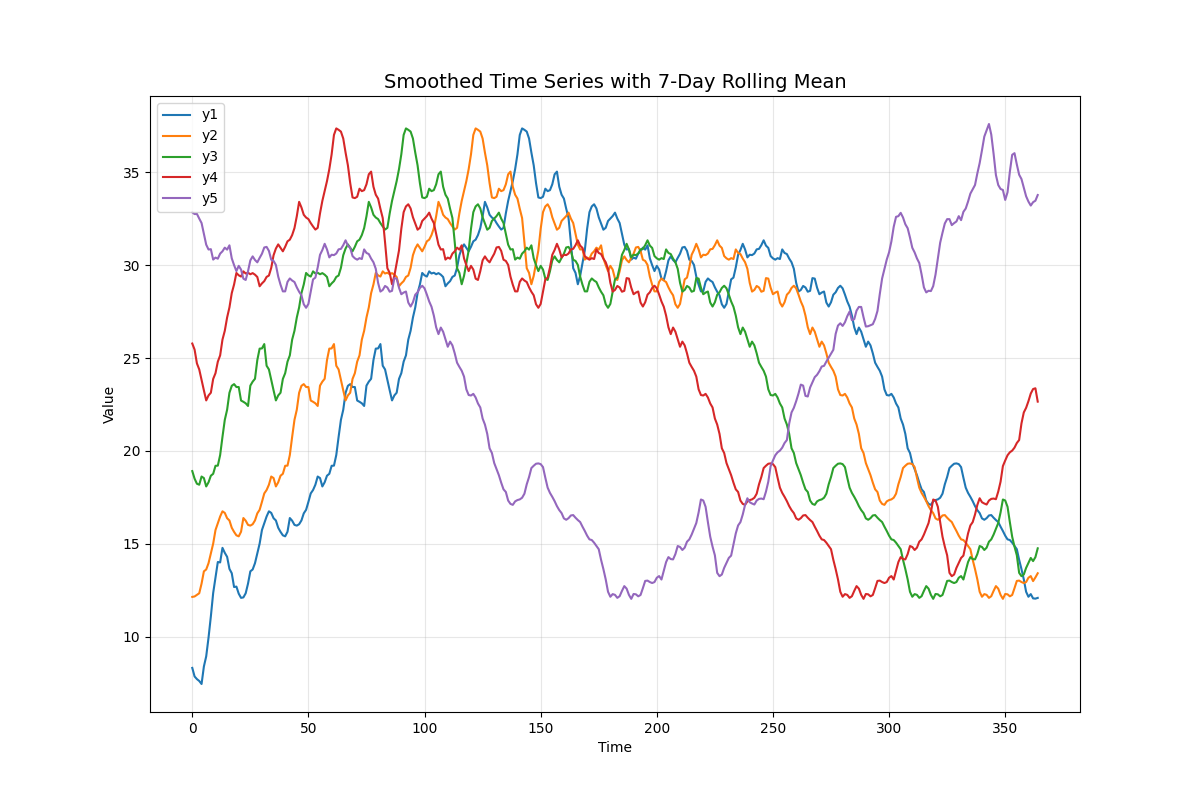

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# put your time series into a list for looping
ys = [y1, y2, y3, y4, y5]
labels = [f"y{i}" for i in range(1, 6)]

plt.figure(figsize=(12, 8))

for y, label in zip(ys, labels):
    smoothed = y.rolling(window=7, min_periods=1, center=True).mean()
    plt.plot(np.arange(len(y)), smoothed, label=label)

plt.title("Smoothed Time Series with 7-Day Rolling Mean", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
